<a href="https://colab.research.google.com/github/hemander1433/DATA-SCIENCE-ASSIGNEMNT/blob/main/sai_hemander_kambhampati_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**EDA AND BUSINESS INSIGHTS TASK 1:**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Take a quick look at the data
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [4]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [16]:

# Convert date columns to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")



<ipython-input-17-0950551fd383>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette="viridis")


Text(0.5, 0, 'Total Sales (₹)')

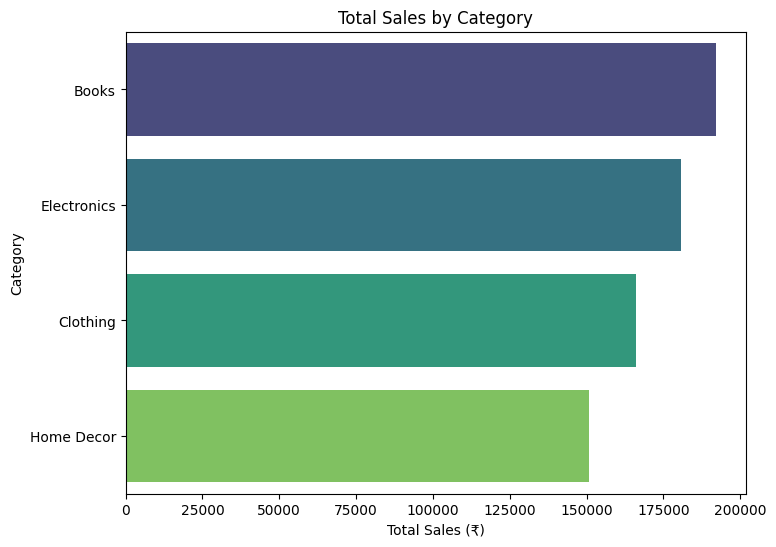

In [17]:
# 1.  BUSSINESS INSIGHT :  Total sales by category


sales_by_category = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_category.values, y=sales_by_category.index, palette="viridis")
plt.title("Total Sales by Category")
plt.xlabel("Total Sales (₹)")

<ipython-input-19-4f54227733cc>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sales_by_region.values, y=sales_by_region.index, palette="coolwarm")


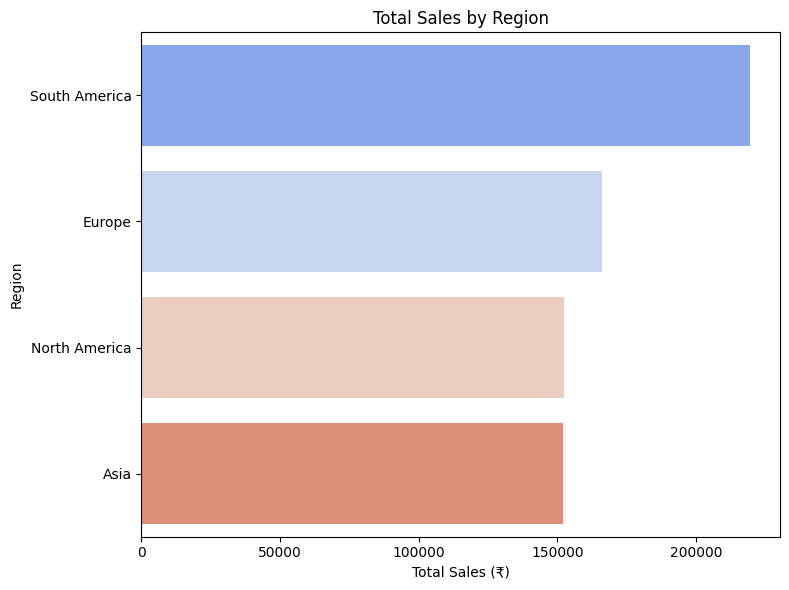

In [19]:
  # 2. BUSSINESS INSIGHT :  SALES BY REGION.

sales_by_region = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=sales_by_region.values, y=sales_by_region.index, palette="coolwarm")
plt.title("Total Sales by Region")
plt.xlabel("Total Sales (₹)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


<ipython-input-20-c9808547eded>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=popular_products.values, y=popular_products.index, palette="magma")


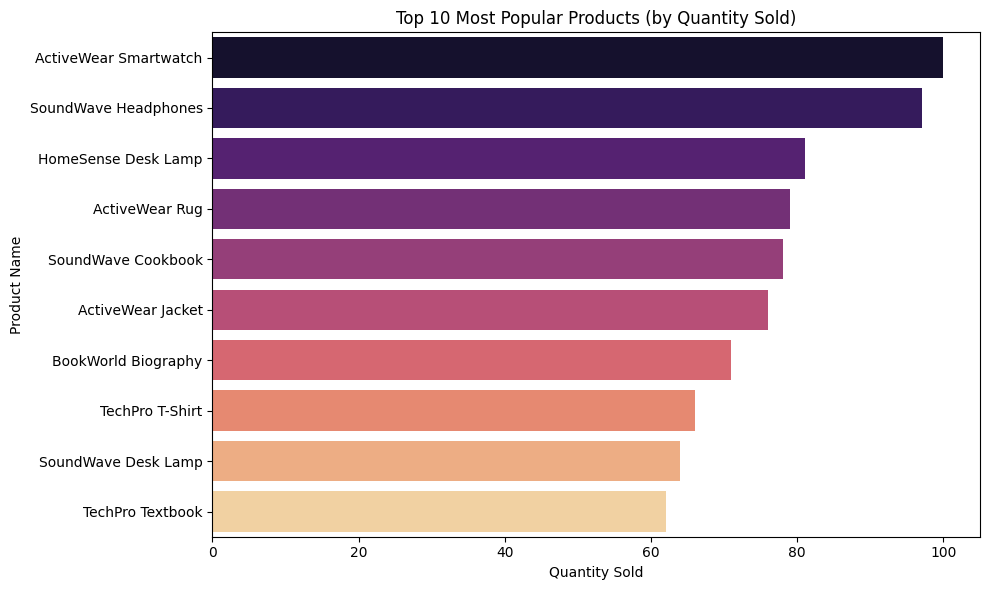

In [20]:
  # 3. BUSSINESS INSIGHT :  POPULAR PRODUCTS BY QUANTITY SOLD.


popular_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=popular_products.values, y=popular_products.index, palette="magma")
plt.title("Top 10 Most Popular Products (by Quantity Sold)")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


<ipython-input-21-d764ccc1cc50>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transactions_by_region.values, y=transactions_by_region.index, palette="pastel")


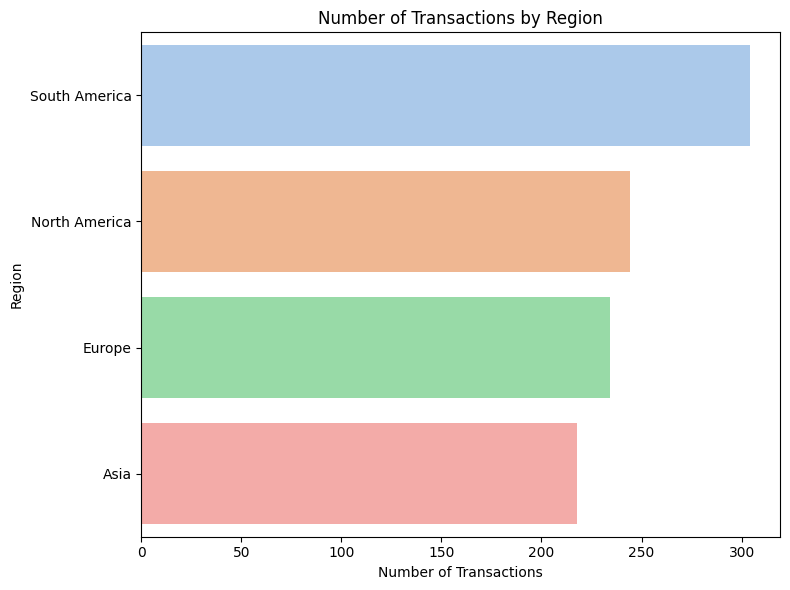

In [21]:
 # 4. BUSSINESS INSIGHT :  TRANSACTIONS PER REGION.

transactions_by_region = merged_data.groupby("Region")["TransactionID"].count().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=transactions_by_region.values, y=transactions_by_region.index, palette="pastel")
plt.title("Number of Transactions by Region")
plt.xlabel("Number of Transactions")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


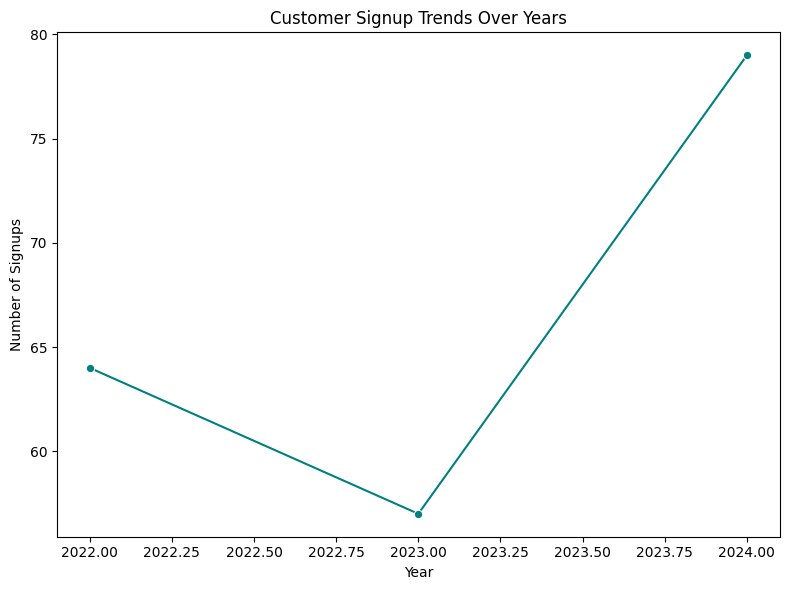

In [22]:
 # 5.  BUSSINESS INSIGHT :  CUSTOMER COUNT.

customers['SignupYear'] = customers['SignupDate'].dt.year
signup_trends = customers.groupby("SignupYear")["CustomerID"].count()

plt.figure(figsize=(8, 6))
sns.lineplot(x=signup_trends.index, y=signup_trends.values, marker="o", color="teal")
plt.title("Customer Signup Trends Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.tight_layout()
plt.show()
